In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Preprocessing

In [ ]:
# load data
df = pd.read_csv('/content/drive/MyDrive/Fellowship-main/train_df6.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Fellowship-main/test_df6.csv')

In [ ]:
# check duplicate
df.duplicated().sum()

0

In [ ]:
# check null and type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6942 entries, 0 to 6941
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        6942 non-null   object 
 1   gender            6942 non-null   object 
 2   SeniorCitizen     6942 non-null   int64  
 3   Partner           6942 non-null   object 
 4   Dependents        6942 non-null   object 
 5   tenure            6942 non-null   int64  
 6   PhoneService      6942 non-null   object 
 7   MultipleLines     6942 non-null   object 
 8   InternetService   6942 non-null   object 
 9   OnlineSecurity    6942 non-null   object 
 10  OnlineBackup      6942 non-null   object 
 11  DeviceProtection  6942 non-null   object 
 12  TechSupport       6942 non-null   object 
 13  StreamingTV       6942 non-null   object 
 14  StreamingMovies   6942 non-null   object 
 15  Contract          6942 non-null   object 
 16  PaperlessBilling  6942 non-null   object 


In [ ]:
# see the unique value in data
columns = df.columns
for i in columns:
  print(i)
  print(df[i].unique())
  print(' ')

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '2758-RNWXS' '2314-TNDJQ'
 '2405-LBMUW']
 
gender
['Female' 'Male']
 
SeniorCitizen
[0 1]
 
Partner
['Yes' 'No']
 
Dependents
['No' 'Yes']
 
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
 
PhoneService
['No' 'Yes']
 
MultipleLines
['No phone service' 'No' 'Yes']
 
InternetService
['DSL' 'Fiber optic' 'No']
 
OnlineSecurity
['No' 'Yes' 'No internet service']
 
OnlineBackup
['Yes' 'No' 'No internet service']
 
DeviceProtection
['No' 'Yes' 'No internet service']
 
TechSupport
['No' 'Yes' 'No internet service']
 
StreamingTV
['No' 'Yes' 'No internet service']
 
StreamingMovies
['No' 'Yes' 'No internet service']
 
Contract
['Month-to-month' 'One year' 'Two year']
 
PaperlessBilling
['Yes' 'No']
 
PaymentMethod
['Electronic check' 'Mailed check' 'Bank tran

In [ ]:
# str to float TotalCharges
charges = pd.concat([df['TotalCharges'].str.split()
                       .str[0]
                       .str.replace(',','').astype(float)], axis=1)
df['TotalCharges'] = charges

In [ ]:
df = df[df['TotalCharges'].isnull()==False]

In [ ]:
# One Hot Encoding
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc.fit(df[['gender', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']])
encode = enc.transform(df[['gender', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']]).toarray()
df1 = np.concatenate([encode,np.array(df[['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen']])],axis = 1)

In [ ]:
from collections import Counter
Counter(df['Churn'])

Counter({'No': 5092, 'Yes': 1839})

In [ ]:
# smote
from imblearn.over_sampling import SMOTE
smote = SMOTE("minority")
data,label = smote.fit_sample(df1,df['Churn'])

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from collections import Counter
Counter(label)

Counter({'No': 5092, 'Yes': 5092})

In [ ]:
# scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)
data = scaler.transform(data)

In [ ]:
# split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, label, test_size=0.1)

In [ ]:
# encode label
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [ ]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [ ]:
x_train.shape

(9165, 45)

# Model

In [ ]:
init = keras.initializers.HeUniform()
model = Sequential()
model.add(Dense(500, kernel_initializer=init, activation='relu', input_dim=45))
model.add(Dropout(0.2))
model.add(Dense(250, kernel_initializer=init, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(125, kernel_initializer=init, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(62, kernel_initializer=init, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(31, kernel_initializer=init, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(15, kernel_initializer=init, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, kernel_initializer=init, activation='sigmoid'))

# Compile the model
model.compile(loss=keras.losses.BinaryCrossentropy(),
          optimizer=keras.optimizers.Adam(learning_rate=0.001),
          metrics=['accuracy']
)

In [ ]:
history = model.fit(x_train, y_train, epochs=1000, 
                  validation_data=(x_test, y_test),
                  callbacks = keras.callbacks.EarlyStopping(
                              monitor='val_accuracy', 
                              patience=50,
                              restore_best_weights=True))

Epoch 1/1000
287/287 [==============================] - 3s 7ms/step - loss: 0.7240 - accuracy: 0.6291 - val_loss: 0.4945 - val_accuracy: 0.7625
Epoch 2/1000
287/287 [==============================] - 2s 5ms/step - loss: 0.5084 - accuracy: 0.7563 - val_loss: 0.4746 - val_accuracy: 0.7684
Epoch 3/1000
287/287 [==============================] - 2s 5ms/step - loss: 0.4936 - accuracy: 0.7664 - val_loss: 0.4608 - val_accuracy: 0.7743
Epoch 4/1000
287/287 [==============================] - 2s 5ms/step - loss: 0.4768 - accuracy: 0.7791 - val_loss: 0.4733 - val_accuracy: 0.7782
Epoch 5/1000
287/287 [==============================] - 1s 5ms/step - loss: 0.4700 - accuracy: 0.7819 - val_loss: 0.4654 - val_accuracy: 0.7861
Epoch 6/1000
287/287 [==============================] - 2s 5ms/step - loss: 0.4603 - accuracy: 0.7851 - val_loss: 0.4432 - val_accuracy: 0.7978
Epoch 7/1000
287/287 [==============================] - 2s 5ms/step - loss: 0.4392 - accuracy: 0.7987 - val_loss: 0.4292 - val_accuracy:

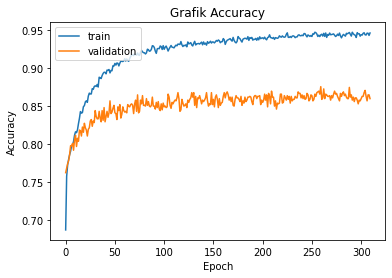

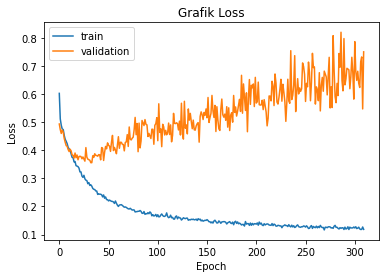

In [ ]:
#Grafik
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Grafik Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Grafik Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
pred = model.predict_classes(x_test)
print(classification_report(pred,y_test))
print(confusion_matrix(pred,y_test))
print(accuracy_score(pred,y_test))

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           0       0.83      0.90      0.86       442
           1       0.92      0.86      0.89       577

    accuracy                           0.88      1019
   macro avg       0.87      0.88      0.87      1019
weighted avg       0.88      0.88      0.88      1019

[[397  45]
 [ 82 495]]
0.8753680078508341


# TEST

In [ ]:
encode = enc.transform(df_test[['gender', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']]).toarray()
df_tes = np.concatenate([encode,np.array(df_test[['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen']])],axis = 1)

In [ ]:
df_tes = scaler.transform(df_tes)

In [ ]:
pred = model.predict_classes(df_tes)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
pred = pd.DataFrame(pred)

In [ ]:
pred

,0
0,0
1,1
2,0
3,0
4,0
...,...
95,0
96,1
97,0
98,1


In [ ]:
pred.to_csv('/content/drive/My Drive/Hasil.csv',index=False)